In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
#load datatsets
combined_df = pd.read_csv("../data/derived/medals.csv")
summer_df = pd.read_csv("../data/derived/summer_medals.csv")
winter_df = pd.read_csv("../data/derived/winter_medals.csv")

#count total number of medals won
country_total_medals = combined_df.groupby('country_3_letter_code').size().reset_index(name='Total Medals')
summer_medals = summer_df.groupby('country_3_letter_code').size().reset_index(name='Total Medals')
winter_medals = winter_df.groupby('country_3_letter_code').size().reset_index(name='Total Medals')

In [3]:
world = gpd.read_file('countries.geojson') #load world map file 
world = world[world['ADMIN'] != 'Antarctica'] #exclude antartica on the map
medals_map_data = pd.merge(world, country_total_medals, how='left', left_on='ISO_A3', right_on='country_3_letter_code')
summer_medals_map_data = pd.merge(world, summer_medals, how='left', left_on='ISO_A3', right_on='country_3_letter_code')
winter_medals_map_data = pd.merge(world, winter_medals, how='left', left_on='ISO_A3', right_on='country_3_letter_code')

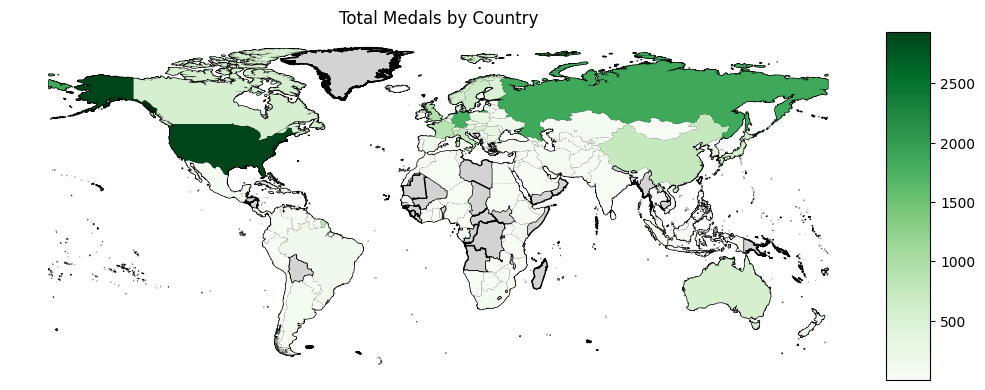

In [4]:
## TOTAL MEDALS WON
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(ax=ax, color='lightgray', edgecolor='black')
medals_map_data.plot(ax=ax, column='Total Medals', cmap='Greens', edgecolor = None, legend=True, cax=cax)
ax.set_title('Total Medals by Country')
ax.set_axis_off()
plt.show()

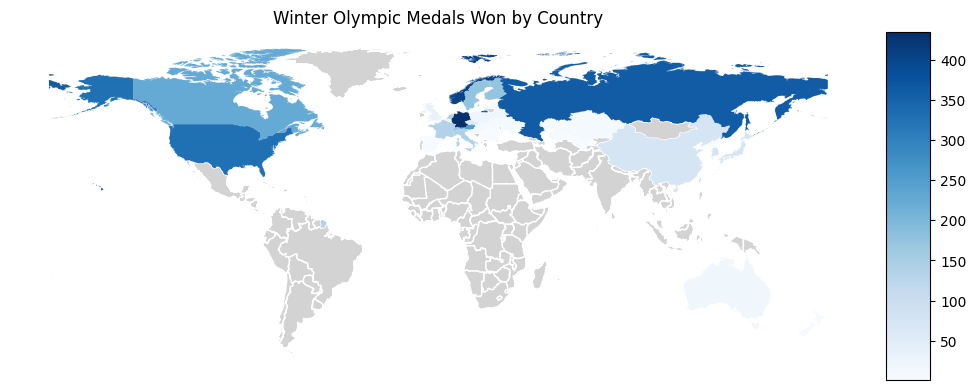

In [5]:
## WINTER MEDALS PLOT 
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(ax=ax, color='lightgray', edgecolor='white')
winter_medals_map_data.plot(ax=ax, column='Total Medals', cmap='Blues', legend=True, cax = cax)
ax.set_title('Winter Olympic Medals Won by Country')
ax.set_axis_off()
plt.show()